In [9]:
library(tidyverse)

Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [10]:
set.seed(111)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [3]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 9.423928

[1] 11.23805

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [4]:
tapply(X = complete_data$measure, INDEX = complete_data$site_name, FUN = mean)

Site 1    Site 2 
 9.423928 11.238045

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [16]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data <- rbind(data_1, data_2)

#### Q2.0 
Complete the following by describing the null and the alternative hypotheses we are testing here.

In [17]:
# H0: There is no difference in "mean of measure" between Site 1 and Site 2
# H1: There is difference in "mean of measure" between Site 1 and Site 2
t.test(data_1$measure, data_2$measure)
#P.value (2.2e-16) indicates that we reject the null hypothesis, 
# meaning there is significantly low chance that means of measured factors between Site 1 and Site 2 are equal. 


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = -12.056, df = 74.217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.975853 -2.131763
sample estimates:
mean of x mean of y 
 10.14979  12.70360 


#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

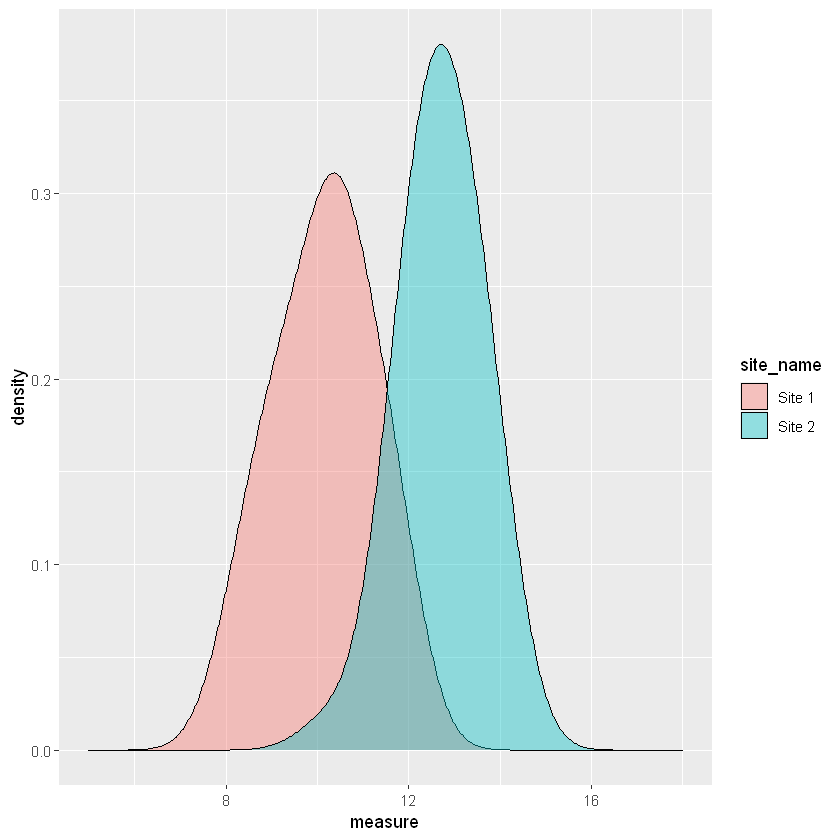

In [18]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.65) + 
  xlim(5,18)

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

In [19]:
#selected test statistic is difference in means (of measure) of two sites (site 1 vs. site 2)
#simulating using bootstrapping under the H0 which assume all of the data are from same distribution
process1 <- function(data_1, data_2){
    
    concat_data <- c(data_1, data_2)
    len_concat_data <- length(concat_data)
    len_data_1 <- length(data_1)    
    shuffled_data <- sample(concat_data)
    new_data_1 <- shuffled_data[1:len_data_1]
    new_data_2 <- shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
}

In [20]:
###repeat the above process multiple times, generating data of mean differences
mean_under_null = replicate(1000, process1(data_1$measure, data_2$measure))

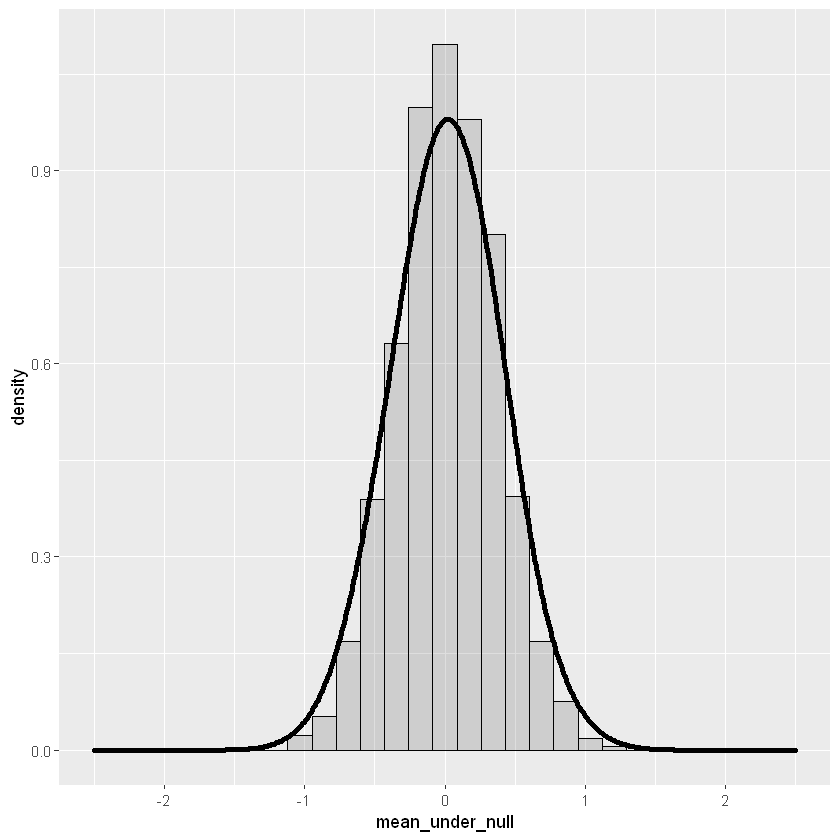

In [21]:
###plot the data under the null
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") +
geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-2.5, 2.5)

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


In [22]:
### calculating observed statistic (the actual mean difference of collected data)
observed_value <- mean(data_1$measure) - mean(data_2$measure)
observed_value

[1] -2.553808

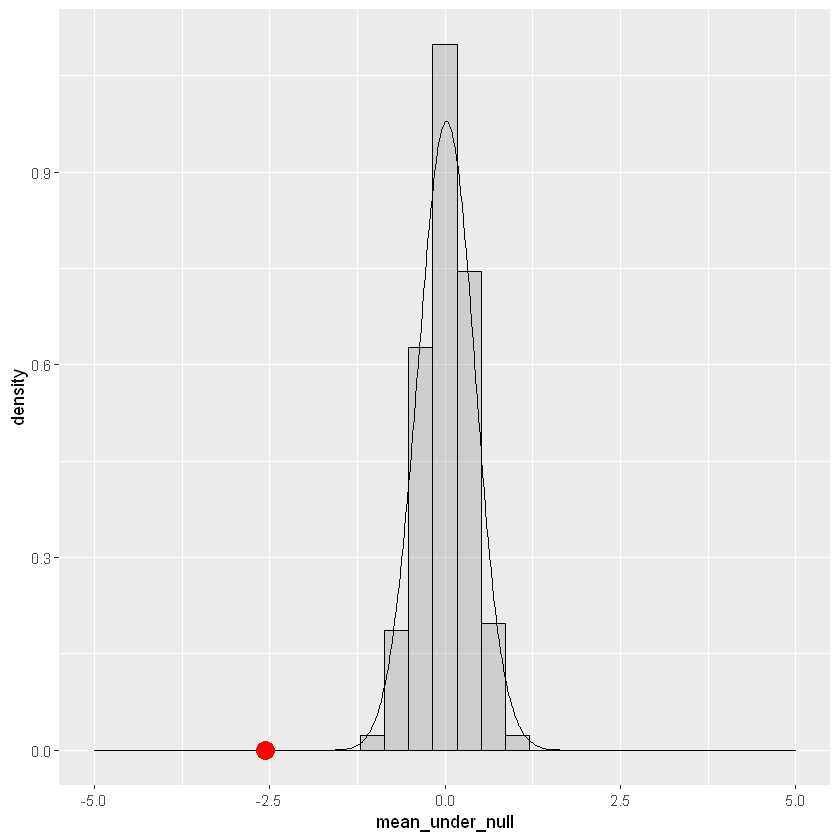

In [23]:
### plotting the observed value into the simulated null distribution (likelihood of observed data)
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=5)

#### Q2.4 
compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q

In [24]:
### ratio(%) of our observed value is equal or larger than the null distribution by chance is 0
sum(mean_under_null <= observed_value) / length(mean_under_null)

[1] 0

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [25]:
###creating table
species = c('P. lobata','P. lobata','M. capitata','M. capitata','P. meandrina','P. meandrina')
proportion = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
sites = rep(c("Site_X", "Site_Y"), 3)
coral_prop <- tibble(species, proportion, sites)

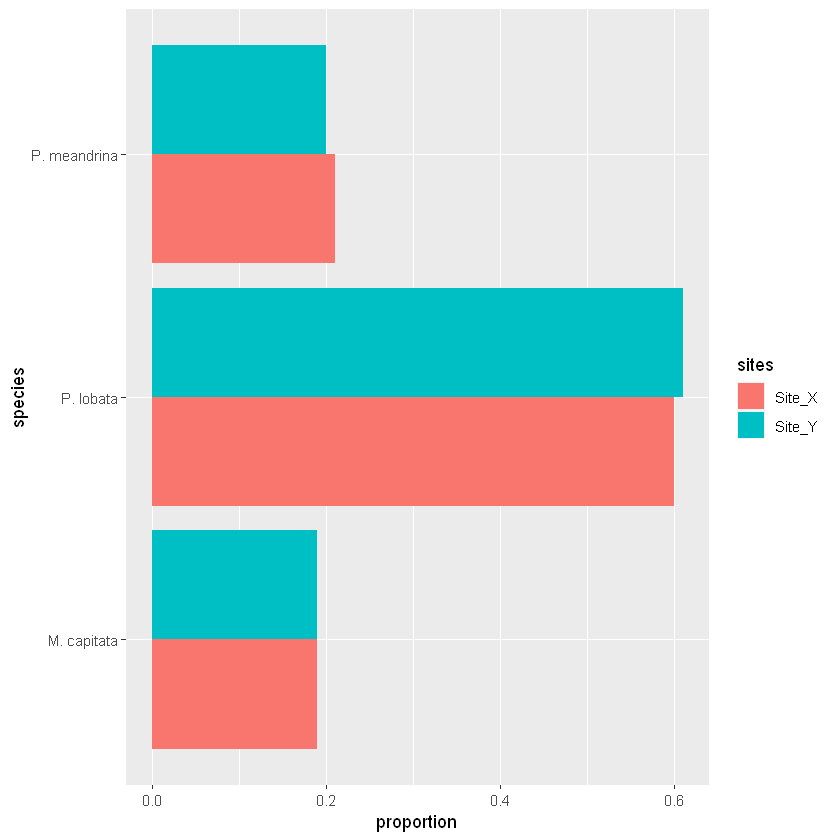

In [26]:
###checking with bar plot
ggplot(coral_prop, aes(fill=sites, y=proportion, x=species)) + 
    geom_bar(position="dodge", stat="identity") + 
    coord_flip()

In [27]:
#H0: The observed difference between both site is due to sampling
#HA: The difference is too big to be due to random chance alone
#Test statistics: quantify the distance between two distributions using the **total variation distance**
subtract_abs = function(x){
    abs(x[1] - x[2])
}
sum(tapply(coral_prop$proportion, coral_prop$species, subtract_abs))/2

[1] 0.01

In [28]:
#Generating data under null using Multinomial distribution
rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200

0.615
0.205
0.180


In [29]:
#Simulating Hypothesis
#Generate a random sample using the multinomial distributions and the observed proportions
sampleOneIteration <- function(){
    true_proportions <- c(0.60, 0.19, 0.21)
    sample_proportions <- rmultinom(1, 200, prob=c(0.61, 0.19, 0.20))/200
    sample_tvd <- sum(abs(true_proportions- sample_proportions))/2
    sample_tvd   
}
sampleOneIteration()

[1] 0.06

[1] 0.955

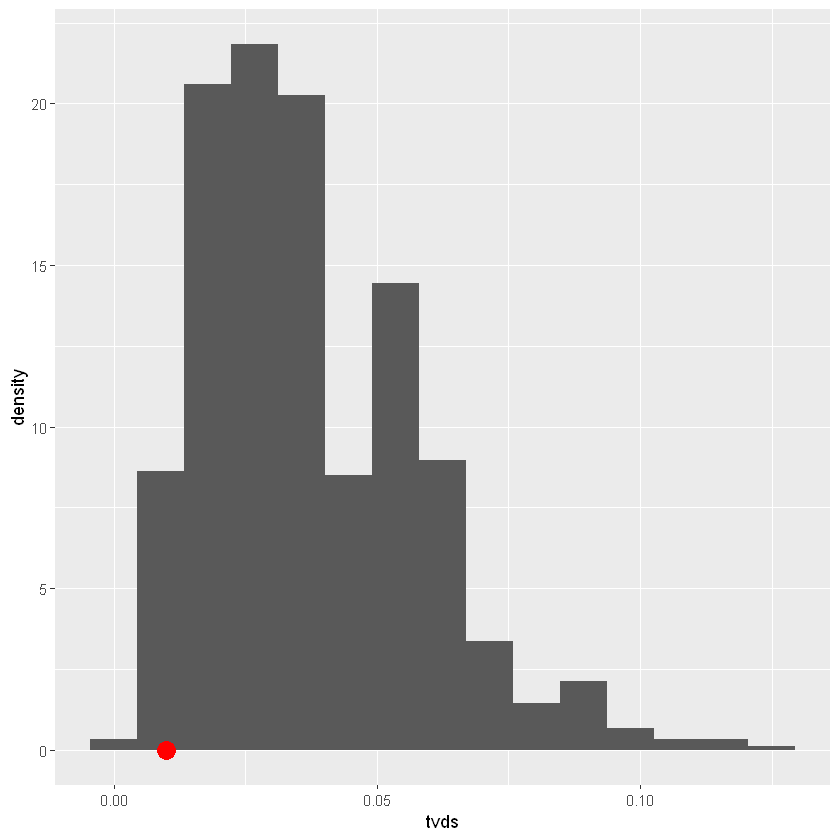

In [30]:
#Compute and store the sample `tvd` to build the background distribution
tvds <- replicate(1000, sampleOneIteration())
#Compare the observed value against the data simulated under the null hypothesis
observed_stat <- sum(tapply(coral_prop$proportion, coral_prop$species, subtract_abs))/2
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")

In [32]:
#p.values
p_value <- sum(tvds > observed_stat)  / length(tvds)
p_value
#P.vale (0.948) indicates that we failed to reject the H0
#meaning the obtained difference between the sample and true proportion (tvd) is almost likely 
#due to random chance.

[1] 0.955